### Importing necessary libraries

In [3]:
import numpy as np

import pandas as pd

import seaborn as sns

import plotly.express as px

import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from  sklearn.model_selection import GridSearchCV


### Loading the Dataset

In [4]:
data = pd.read_csv("data.csv")

### Exploring the Data

In [5]:
len(data.index), len(data.columns)

(569, 33)

In [6]:
data.shape

(569, 33)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [10]:
data.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
data = data.dropna(axis='columns')

In [12]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
data.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [14]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### Basic Data Visualisation

In [15]:

fig = px.histogram(data, x='diagnosis', title='Counts of Diagnosis', labels={'diagnosis': 'Diagnosis', 'count': 'Counts'})

# Updating layout
fig.update_layout(
    plot_bgcolor='#f5f5f5',  # Setting the background color
    xaxis=dict(title='Diagnosis', titlefont=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title='Counts', titlefont=dict(size=14), tickfont=dict(size=12)),
    font=dict(family="Arial", size=12, color="#333333"),  # Updating font properties
    showlegend=False,  # Hiding the legend
)

# Updating the bar color
fig.update_traces(marker_color='#7b9e89', marker_line_color='black', marker_line_width=1.5)

fig.show()


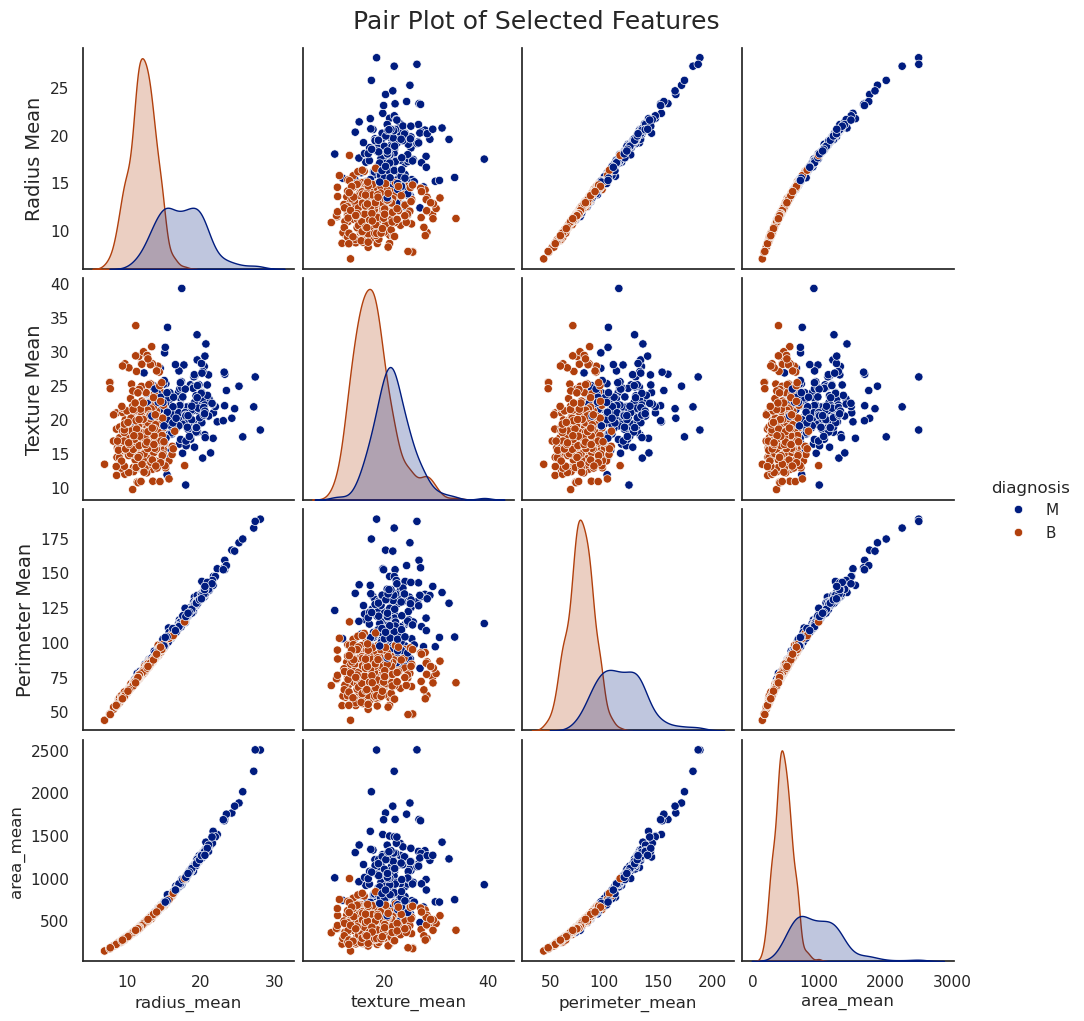

In [16]:

cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

# Creating the pair plot with a vibrant color palette
sns.set(style="white")
g = sns.pairplot(data[cols], hue="diagnosis", palette="dark")

# Customizing the titles and labels
g.fig.suptitle('Pair Plot of Selected Features', y=1.02, fontsize=18)
g.axes[0, 0].set_ylabel("Radius Mean", fontsize=14)
g.axes[1, 0].set_ylabel("Texture Mean", fontsize=14)
g.axes[2, 0].set_ylabel("Perimeter Mean", fontsize=14)
g.axes[2, 0].set_xlabel("Perimeter Mean", fontsize=14)
g.axes[2, 1].set_xlabel("Area Mean", fontsize=14)
g.axes[2, 0].set_xlabel("Perimeter Mean", fontsize=14)

plt.show()


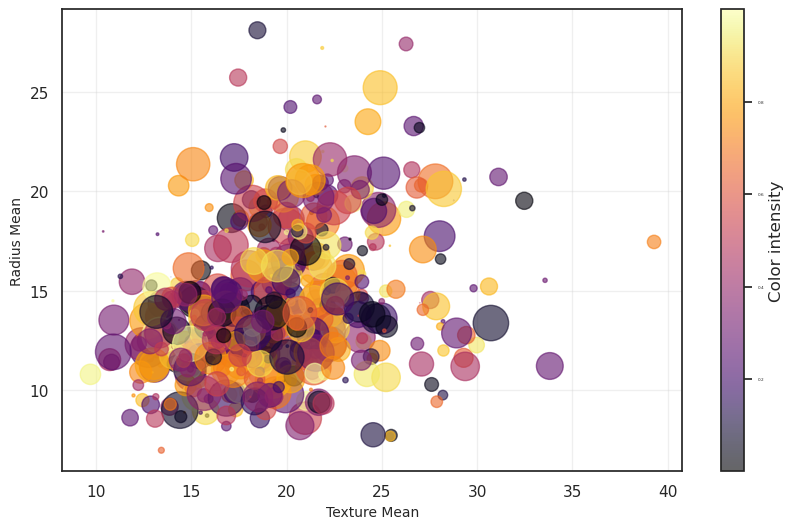

In [17]:

size = len(data['texture_mean'])
area = np.pi * (15 * np.random.rand(size)) ** 2
colors = np.random.rand(size)

# Creating a scatter plot with vibrant colors
plt.figure(figsize=(10, 6))
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.6, cmap='inferno')

# Customizing the plot
plt.xlabel("Texture Mean", fontsize=10)
plt.ylabel("Radius Mean", fontsize=10)
cbar = plt.colorbar(label="Color intensity")
cbar.ax.tick_params(labelsize=3)
plt.grid(True, alpha=0.3)

plt.show()

### Data Filtering

* Now, we have one categorical feature, so we need to convert it into numeric values using LabelEncoder from sklearn.preprocessing packages
* LabelEncoder can be used to normalize labels.

In [18]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [19]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [21]:
data.diagnosis.value_counts().sum()

569

and now we can see, our categorical variable has been converted to 0 and 1

#### now, let's find correlation between the mean features

In [22]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


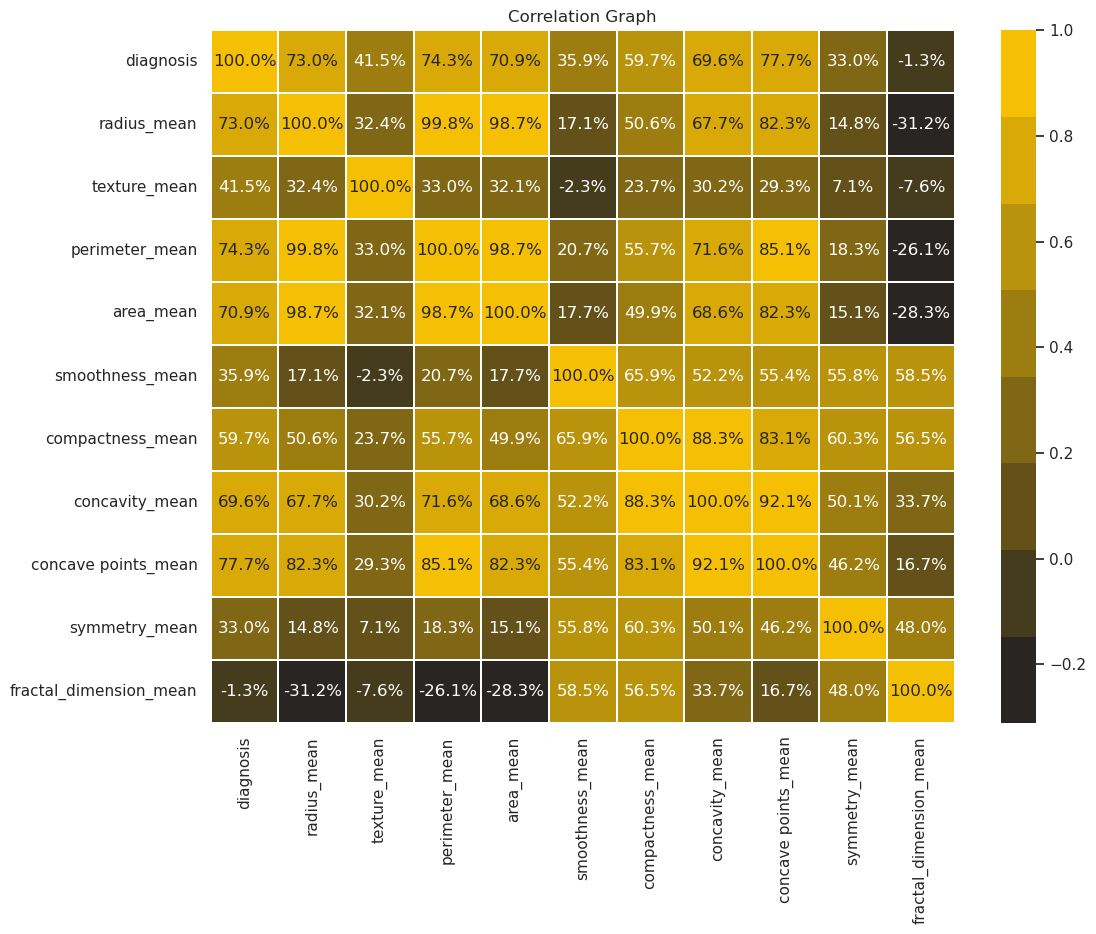

In [23]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.dark_palette("xkcd:golden", 8)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [24]:

fig = px.imshow(data[cols].corr(), labels=dict(x="Features", y="Features", color="Correlation"),
                x=cols, y=cols, color_continuous_scale='RdBu', title="Correlation Heatmap")

# Update layout and fonts
fig.update_layout(width=800, height=600, title_font_size=20, font=dict(family="Arial", size=12, color="#333333"))

# Show the figure
fig.show()


### Model Implementation

#### Train test splitting

preprocessing and model selection

In [25]:
# Check the Model Accuracy, Errors and it's Validations

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

Select Features

In [26]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [28]:
X = data[prediction_feature]
print(X)

     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
0          17.99          122.80     1001.0         0.2419           0.27760   
1          20.57          132.90     1326.0         0.1812           0.07864   
2          19.69          130.00     1203.0         0.2069           0.15990   
3          11.42           77.58      386.1         0.2597           0.28390   
4          20.29          135.10     1297.0         0.1809           0.13280   
..           ...             ...        ...            ...               ...   
564        21.56          142.00     1479.0         0.1726           0.11590   
565        20.13          131.20     1261.0         0.1752           0.10340   
566        16.60          108.30      858.1         0.1590           0.10230   
567        20.60          140.10     1265.0         0.2397           0.27700   
568         7.76           47.92      181.0         0.1587           0.04362   

     concave points_mean  
0           

In [29]:
y = data.diagnosis
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


Splite the dataset into TrainingSet and TestingSet by 33% and set the 15 fixed records

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)

     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave points_mean  
274         

#### Perform Feature Standard Scaling

Standardize features by removing the mean and scaling to unit variance <br>
This process involves transforming the data such that it has a mean of 0 and a standard deviation of 1.

In [31]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### ML Model Building

Fit Model, Predict, and return score and accuracy

In [32]:
def model_building(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)   

Make a dictionary for different models to get scores for different models

In [33]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}


In [34]:
df_prediction = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])

df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)

In [35]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.916010,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
3,SVC,0.923885,0.914894,91.49%


So, RandomForestClassifier is giving the best results in this dataset

### K fold applying <br>
K-fold cross-validation is a technique used in machine learning for model evaluation.<br> It helps in assessing how well a trained model will generalize to an independent dataset.<br> The main idea behind k-fold cross-validation is to split the dataset into k subsets of equal size.<br> Then, the model is trained and evaluated k times, each time using a different subset as the test set and the remaining data as the training set.




Let's define a functino for cross validation scorring for multiple ML models

In [36]:
def cross_val_scorring(model):
    model.fit(data[prediction_feature], data[targeted_feature])
    predictions = model.predict(data[prediction_feature])    
    accuracy = accuracy_score(predictions, data[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")


     # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds
    
    err = []
    
    for train_index, test_index in kFold.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = data[prediction_feature].iloc[train_index, :]
        y_train = data[targeted_feature].iloc[train_index]
        
        X_test = data[prediction_feature].iloc[test_index, :]
        y_test = data[targeted_feature].iloc[test_index]
        
        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )

In [37]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 0.99
Score: 0.99
Score: 0.99
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88


some models have a score of 1, that means a full 100% accuracy, well i am no god and neither is my model,<br>
there's must be overfitting.

### Hypertuning the ML Model

For HyperTunning we can use GridSearchCV to know the best performing parameters<br>It exhaustively searches for the best hyperparameters from a specified grid of parameter values.<br> This process helps to optimize the performance of the model by finding the best combination of hyperparameters.

In [38]:
'''
# Let's Implement Grid Search Algorithm

# Pick the model
model = DecisionTreeClassifier()

# Tunning Params
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)
'''

'\n# Let\'s Implement Grid Search Algorithm\n\n# Pick the model\nmodel = DecisionTreeClassifier()\n\n# Tunning Params\nparam_grid = {\'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n              \'min_samples_split\': [2,3,4,5,6,7,8,9,10], \n              \'min_samples_leaf\':[2,3,4,5,6,7,8,9,10] }\n\n\n# Implement GridSearchCV\ngsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation\n\ngsc.fit(X_train, y_train) # Model Fitting\n\nprint("\n Best Score is ")\nprint(gsc.best_score_)\n\nprint("\n Best Estinator is ")\nprint(gsc.best_estimator_)\n\nprint("\n Best Parametes are")\nprint(gsc.best_params_)\n'

Let's apply same criteria for K Neighbors Classification

In [39]:
# Let's Implement Grid Search Algorithm
# Pick the model
model = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)



 Best Score is 
0.9159244264507423

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=10)

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 10, 'weights': 'uniform'}


 Let's implement same strategy for SVM

In [40]:
# Pick the model
model = SVC()

# Tunning Params
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000], 
     'kernel': ['linear']
    },
    {'C': [0.1, 1, 10, 100, 1000], 
     'gamma': [1, 0.1, 0.01, 0.001], 
     'kernel': ['rbf']
    }
]

# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estimator is ")
print(gsc.best_estimator_)

print("\n Best Parameters are")
print(gsc.best_params_)



 Best Score is 
0.9184885290148449

 Best Estimator is 
SVC(C=0.1, gamma=0.1)

 Best Parameters are
{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}



Using this model, we get a slightly better score


Let's Implementing RandomForestClassifier for hyper Tunning

In [41]:
# Pick the model
model = RandomForestClassifier()

# Tunning Params
random_grid = {'bootstrap': [True, False],
               'max_depth': [40, 50, None],
               'max_features': ['sqrt', 'log2'],  # Updated valid options for max_features
               'min_samples_leaf': [1, 2],
               'min_samples_split': [2, 5],
               'n_estimators': [200, 400]}

# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estimator is ")
print(gsc.best_estimator_)

print("\n Best Parameters are")
print(gsc.best_params_)



 Best Score is 
0.9132253711201079

 Best Estimator is 
RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

 Best Parameters are
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


We have seen the best score for these models, now it's time to deploy

### Deploy Model


Ultimately, our next step is to deploy the model into a production environment.<br> To achieve this, we'll export the model using pickle and save it as 'model.pkl'.<br> This will allow us to easily access the file and make tailored predictions using the Web App API.

In [42]:
import pickle

# Assuming 'best_model' is the variable containing your best-performing model
best_model = gsc.best_estimator_

# Exporting the model using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model has been successfully exported to 'model.pkl'.")


Model has been successfully exported to 'model.pkl'.


In [43]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0])